# Final Project Sea Level Pressure Prediction

## Group Number: 13

## Group Member: Yike Chen, Yayan Li, Yuxin Li

### Import the data and library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

### Take a glance of the original data

#####  After the observation of the data, we know that the period column that in a string type and address, latitude, longtitude, location, resolved_address, they are the same, and obviously they are not valid or not necessary to get involved with the data analysis period

In [2]:
df = pd.read_csv('weather-QueryResult.csv')
df

,period,address,minimum_temperature,maximum_temperature,temperature,dew_point,relative_humidity,heat_index,wind_speed,wind_gust,...,precipitation,precipitation_cover,snow_depth,visibility,cloud_cover,sea_level_pressure,latitude,longitude,location,resolved_address
0,2008-12-31T16:0:0,Malaysia,74.9,93.3,81.6,75.3,82.12,108.1,12.8,NaN,...,4.0,1.85,NaN,5.9,90.8,1008.7,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
1,2009-1-1T16:0:0,Malaysia,74.9,93.3,81.3,74.9,82.17,107.6,12.8,NaN,...,1.8,1.82,NaN,5.6,90.4,1009.1,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
2,2009-1-10T16:0:0,Malaysia,71.7,95.1,81.0,74.4,81.49,107.8,12.8,NaN,...,1.3,0.36,NaN,5.3,90.7,1010.7,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
3,2009-4-10T16:0:0,Malaysia,74.9,96.9,83.5,76.2,80.14,120.1,13.9,NaN,...,1.1,2.18,NaN,5.4,90.1,1009.0,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
4,2009-4-11T16:0:0,Malaysia,73.5,95.1,83.6,77.0,81.72,116.4,13.9,NaN,...,1.0,1.45,NaN,5.4,90.5,1008.6,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2009-4-5T16:0:0,Malaysia,75.3,96.0,82.5,76.2,82.24,116.4,13.9,NaN,...,1.0,1.09,NaN,5.7,90.4,1009.4,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
361,2009-4-6T16:0:0,Malaysia,75.3,96.9,83.3,76.5,81.39,116.4,15.0,NaN,...,2.7,2.18,NaN,5.4,90.2,1009.1,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
362,2009-4-7T16:0:0,Malaysia,75.3,96.9,83.7,76.2,79.64,113.8,13.9,NaN,...,1.0,1.45,NaN,5.6,90.1,1009.1,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia
363,2009-4-8T16:0:0,Malaysia,77.1,96.9,83.8,76.3,79.73,116.4,16.1,NaN,...,2.9,1.09,NaN,5.3,90.5,1009.3,3.1479,101.69405,POINT(101.69405 3.1479),Malaysia


#### [wind_gust] and [snow_depth] are full of NA which need to clear first, and departure the column we mentioned before. So it would go like df.iloc[:,4:17] to get a updated valid and meaningful data

In [3]:
df = df.iloc[:,4:17]
df.drop(labels=['wind_gust','snow_depth'],axis=1,inplace=True)
df

,temperature,dew_point,relative_humidity,heat_index,wind_speed,wind_direction,precipitation,precipitation_cover,visibility,cloud_cover,sea_level_pressure
0,81.6,75.3,82.12,108.1,12.8,216.03,4.0,1.85,5.9,90.8,1008.7
1,81.3,74.9,82.17,107.6,12.8,209.06,1.8,1.82,5.6,90.4,1009.1
2,81.0,74.4,81.49,107.8,12.8,213.35,1.3,0.36,5.3,90.7,1010.7
3,83.5,76.2,80.14,120.1,13.9,256.50,1.1,2.18,5.4,90.1,1009.0
4,83.6,77.0,81.72,116.4,13.9,229.43,1.0,1.45,5.4,90.5,1008.6
...,...,...,...,...,...,...,...,...,...,...,...
360,82.5,76.2,82.24,116.4,13.9,243.46,1.0,1.09,5.7,90.4,1009.4
361,83.3,76.5,81.39,116.4,15.0,228.67,2.7,2.18,5.4,90.2,1009.1
362,83.7,76.2,79.64,113.8,13.9,211.32,1.0,1.45,5.6,90.1,1009.1
363,83.8,76.3,79.73,116.4,16.1,205.57,2.9,1.09,5.3,90.5,1009.3


### Plot the data

#### show the diagram of the data, take a glance and assume it fit the normal model，we can notice that the sea_level_pressure data model matchs the Normal, and dew_point, relative_humidity and wind_direction all fit the normal model

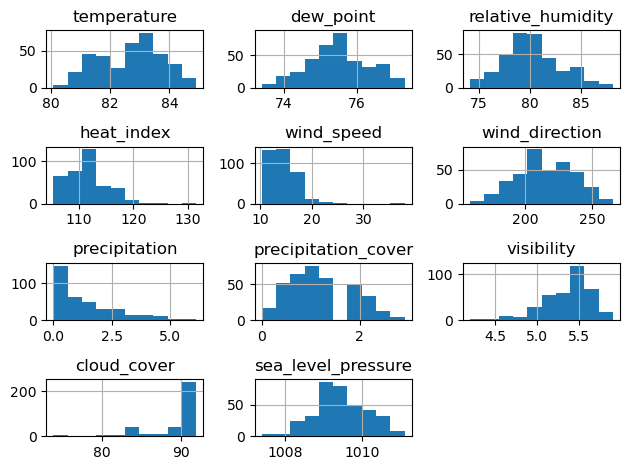

In [4]:
df.hist()
plt.tight_layout()

#### using the describe( ) function to generate descriptive statistics for a DataFrame. These statistics include the mean, standard deviation, minimum, maximum, quartiles, and percentiles for each numerical column in the DataFrame, helping us to know better the data specific point.

In [5]:
df.describe()

,temperature,dew_point,relative_humidity,heat_index,wind_speed,wind_direction,precipitation,precipitation_cover,visibility,cloud_cover,sea_level_pressure
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,82.675616,75.490137,80.259288,111.256438,14.558082,215.064767,1.383014,1.199863,5.347671,88.691781,1009.448219
std,1.070140,0.822427,2.742786,3.991577,2.759135,21.130062,1.334717,0.673489,0.279867,3.549275,0.678620
min,80.100000,73.400000,74.130000,105.300000,10.300000,159.240000,0.000000,0.000000,4.200000,73.800000,1007.400000
25%,81.800000,75.000000,78.420000,108.100000,12.800000,200.670000,0.300000,0.730000,5.200000,90.000000,1009.000000
50%,82.800000,75.500000,79.990000,110.600000,13.900000,212.800000,1.000000,1.090000,5.400000,90.200000,1009.400000
75%,83.400000,76.000000,81.680000,113.800000,16.100000,231.000000,2.100000,1.820000,5.500000,90.500000,1009.900000
max,84.900000,77.300000,88.180000,131.600000,38.000000,265.610000,6.100000,2.910000,5.900000,91.900000,1011.100000


In [6]:
df.shape

(365, 11)

### Due to we want to predict the sea level pressure, we diagram it seperately

Text(0, 0.5, 'Density')

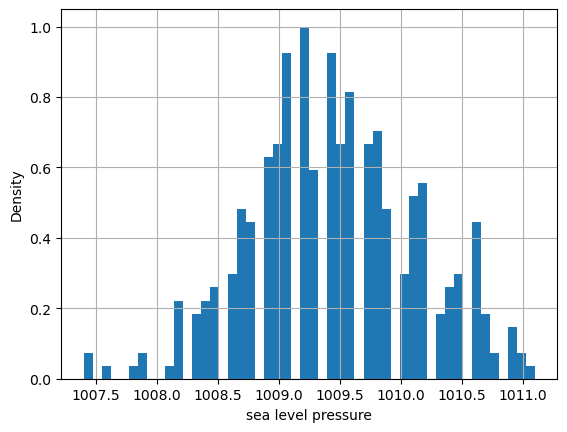

In [7]:
df['sea_level_pressure'].hist(density=True, bins=50)
plt.xlabel("sea level pressure")
plt.ylabel("Density")

#### using the corr() function to caculated linear correlation between sea level pressure and other features.

In [9]:
most_correlated = df.corr()['sea_level_pressure'].sort_values(ascending=False)
most_correlated

sea_level_pressure     1.000000
precipitation_cover    0.114913
precipitation         -0.006767
wind_direction        -0.028407
cloud_cover           -0.048869
wind_speed            -0.098352
relative_humidity     -0.146915
visibility            -0.238370
heat_index            -0.270848
temperature           -0.283536
dew_point             -0.564086
Name: sea_level_pressure, dtype: float64

#### List the most correlated index value

In [10]:
most_correlated.index.values

array(['sea_level_pressure', 'precipitation_cover', 'precipitation',
       'wind_direction', 'cloud_cover', 'wind_speed', 'relative_humidity',
       'visibility', 'heat_index', 'temperature', 'dew_point'],
      dtype=object)

#### this function is to create the train and test data set and depature the top 8th correlated index, which would be used in the following steps

In [11]:
def format_data(df):
    # Targets are sea level pressure
    labels = df['sea_level_pressure']
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Sea Level Pressure
    most_correlated = df.corr().abs()['sea_level_pressure'].sort_values(ascending=False)
    
    # Maintain the top 8 most correlation features with total energy use
    #most_correlated = most_correlated[:8]
    most_correlated = most_correlated.index.values[:8]
    
    #df = df[:, most_correlated.index]
    #df = df[:, most_correlated]
    df = df[most_correlated]
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

### Implement the format_data function, and give a glance of the training data

In [12]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head(20)

,sea_level_pressure,dew_point,temperature,heat_index,visibility,relative_humidity,precipitation_cover,wind_speed
155,1009.9,74.8,82.8,108.1,5.5,77.95,2.18,21.9
261,1008.5,76.2,80.6,110.6,5.5,87.22,1.82,15.0
132,1009.2,75.3,83.5,108.1,5.3,77.32,0.36,15.0
222,1009.1,75.6,81.0,109.4,5.0,84.71,1.45,11.4
140,1008.7,75.1,83.3,110.6,5.3,77.93,1.82,17.2
17,1009.5,77.1,82.5,114.7,5.1,84.85,2.18,13.9
148,1010.6,74.8,83.0,107.8,5.3,77.75,1.82,11.4
24,1011.1,74.2,81.2,105.4,5.5,80.83,1.82,17.2
198,1010.6,74.6,82.3,108.1,5.5,78.86,1.45,13.9
320,1008.9,75.7,82.9,113.1,5.3,80.13,1.09,12.8


In [13]:
print(X_train.shape)
print(X_test.shape)

(273, 8)
(92, 8)


### The explaination of the function below
- This function and code snippet appear to be a part of a data visualization routine using seaborn and matplotlib libraries in Python. They are used to create a pair grid object that displays pairwise relationships in a dataset. Here are the main points:

- corrfunc is a custom function defined to compute and annotate the Pearson correlation coefficient between two variables x and y.

- Inside this function, stats.pearsonr(x, y) computes the Pearson correlation coefficient.

- cmap defines a colormap for use in the density plots, using seaborn's cubehelix_palette to create a gradient that is light for high values and dark for low values, with a hue value of 0.5.


- sns.set_context is used to adjust the plotting context and, in this case, potentially scale up the font size for all elements of the plots for better readability.


- A seaborn PairGrid object g is created using the training dataset X_train. This grid helps in visualizing the dataset's pairwise relationships.


- On the upper triangle of the grid (g.map_upper), scatter plots are drawn with small red points of size 10 to visualize the relationships between pairs of variables.


- On the diagonal (g.map_diag), the distribution of each variable is plotted as a histogram without a Kernel Density Estimate (KDE) overlay, and the color red is used for the bars.


- On the lower triangle of the grid (g.map_lower), two functions are mapped:

- sns.kdeplot to create a 2D KDE over the scatter plot that helps in visualizing the density of points, colored by the defined cmap.

- corrfunc to compute and annotate the Pearson correlation coefficient on each plot.


/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, l

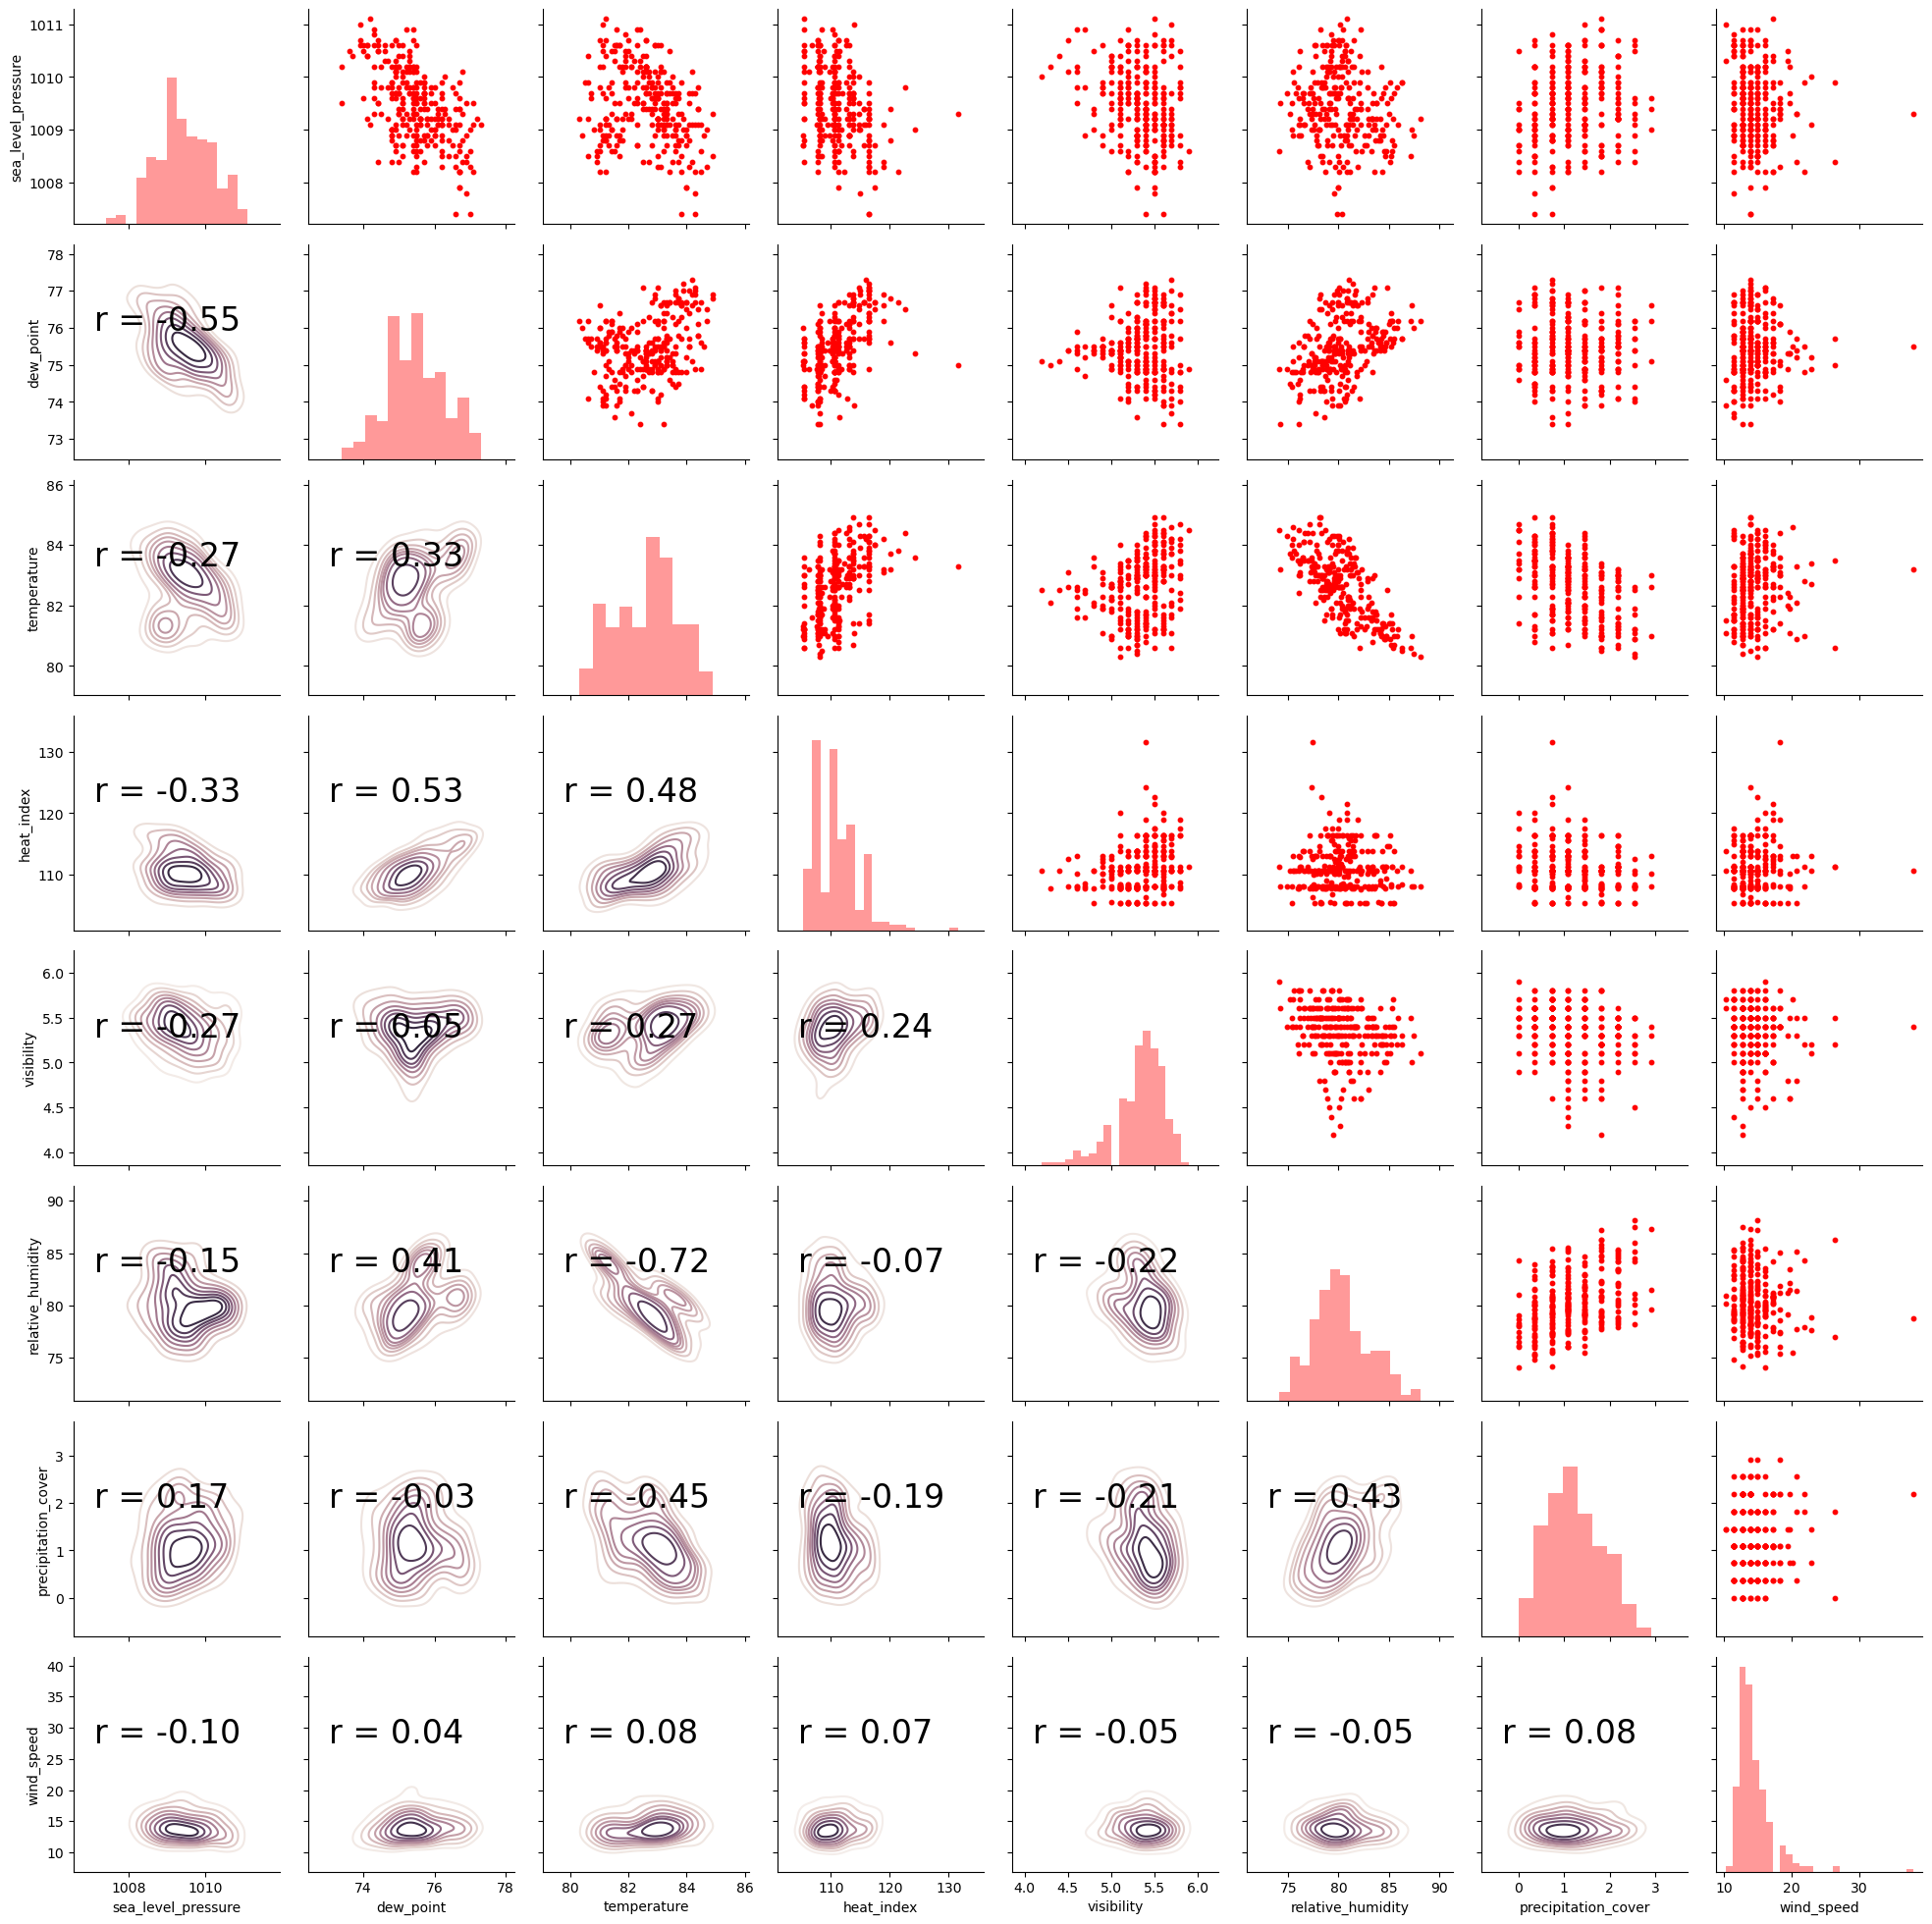

In [14]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [15]:
df['sea_level_pressure'].median()

1009.4

In [17]:
X_plot = X_train.copy()
# X_plot['relation_median'] = (X_plot['Total Energy Use (Thous. tonnes oil eq. (ktoe))'] >= 50000)
X_plot['relation_median'] = (X_plot['sea_level_pressure'] >= 1010)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
# X_plot = X_plot.drop(columns='Total Energy Use (Thous. tonnes oil eq. (ktoe))')
X_plot = X_plot.drop(columns='sea_level_pressure')

### This diagram is to see the relationship between the data and the median , try to figure out that more data below median or more data above median

/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

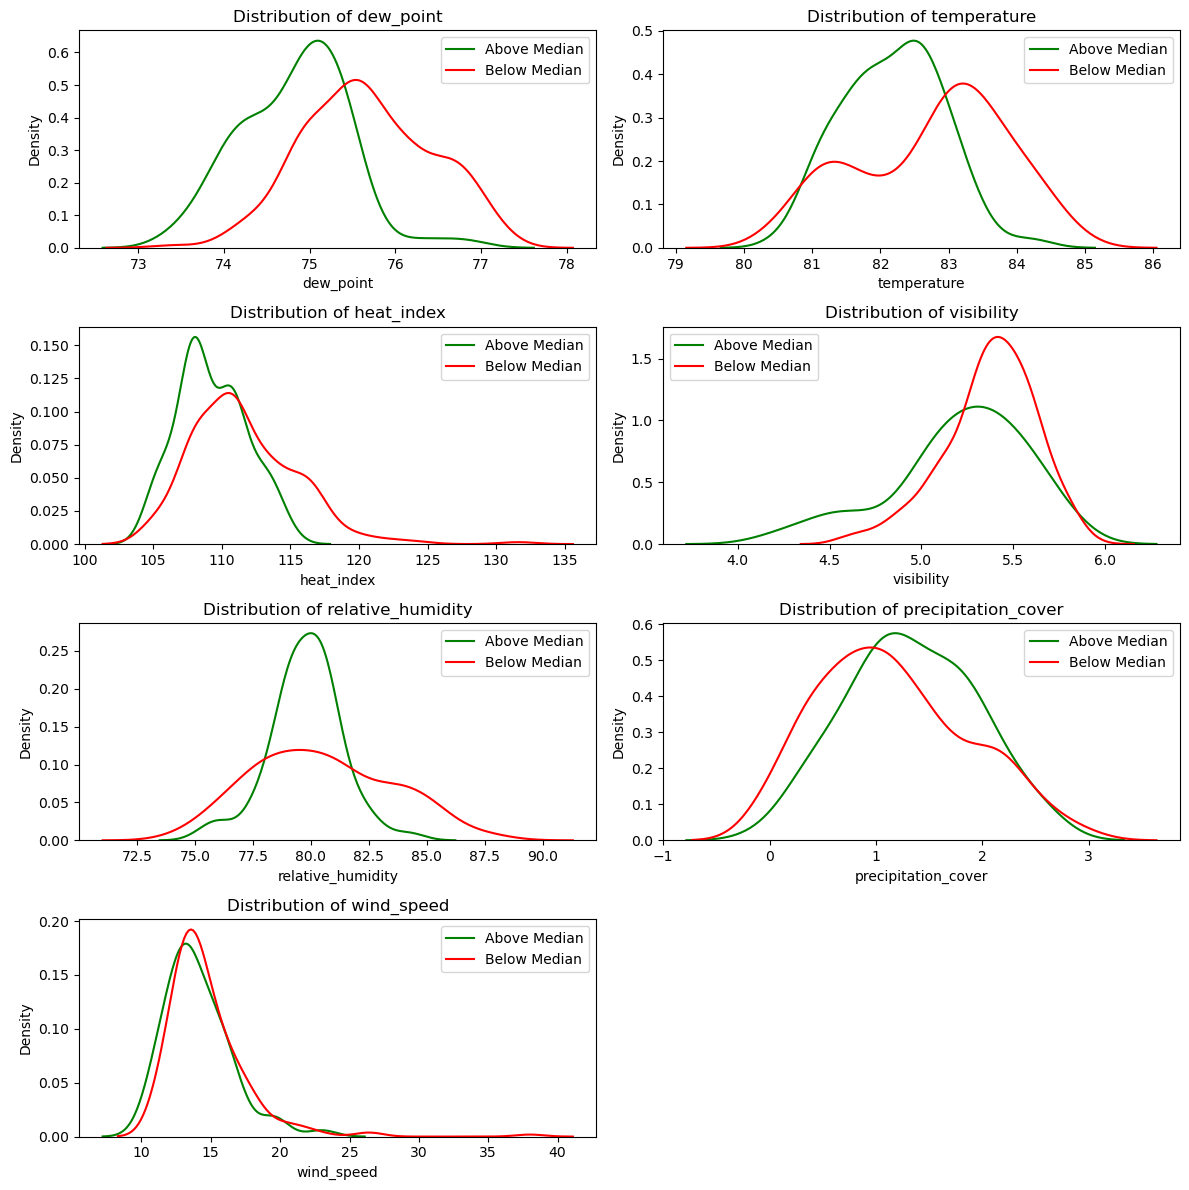

In [18]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored
# by the relation to the median sea level pressure
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green')
    sns.kdeplot(subset_below[col], label = 'Below Median', color = 'red')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

#### This code sets up a Bayesian linear regression model using the PyMC library to predict sea level pressure from various weather-related predictors. It defines priors for regression coefficients and standard deviation, constructs a linear equation, and specifies a likelihood with the observed sea level pressure data. The model is ready to be fit to the data using MCMC sampling, although the actual sampling step is not included in the snippet.

In [19]:
import pymc as pm
from pymc import HalfCauchy, Model, Normal, sample

with Model() as model:
    heat_index = pm.Data('heat_index', df['heat_index'])
    wind_speed = pm.Data('wind_speed', df['wind_speed'])
    precipitation_cover = pm.Data('precipitation_cover', df['precipitation_cover'])
    relative_humidity = pm.Data('relative_humidity', df['relative_humidity'])
    dew_point = pm.Data('dew_point', df['dew_point'])
    visibility = pm.Data('visibility', df['visibility'])
    temperature = pm.Data('temperature', df['temperature'])
    
    # Define priors
    beta_i = pm.Normal("beta_i", mu=0, sigma=1)
    beta_heat_index = pm.Normal("beta_heat_index", mu=0, sigma=1)
    beta_wind_speed = pm.Normal("beta_wind_speed", mu=0, sigma=1)
    beta_precipitation_cover = pm.Normal("beta_precipitation_cover", mu=0, sigma=1)
    beta_relative_humidity = pm.Normal("beta_relative_humidity", mu=0, sigma=1)
    beta_dew_point = pm.Normal("beta_dew_point", mu=0, sigma=1)
    beta_visibility = pm.Normal("beta_visibility", mu=0, sigma=1)
    beta_temperature = pm.Normal("beta_temperature", mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # linear model--Normal
    mu = beta_i + beta_heat_index * heat_index + beta_precipitation_cover * precipitation_cover + beta_wind_speed * wind_speed + beta_relative_humidity * relative_humidity + beta_temperature * temperature + beta_visibility * visibility + beta_dew_point * dew_point
    # p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    pm.Normal("sea_level_pressure", mu=mu, sigma=sigma, observed=df["sea_level_pressure"])

/Users/deboo/anaconda3/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [20]:
#MCMC
with model:
    trace = pm.sample(1000, tune=500, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_i, beta_heat_index, beta_wind_speed, beta_precipitation_cover, beta_relative_humidity, beta_dew_point, beta_visibility, beta_temperature, sigma]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 85 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


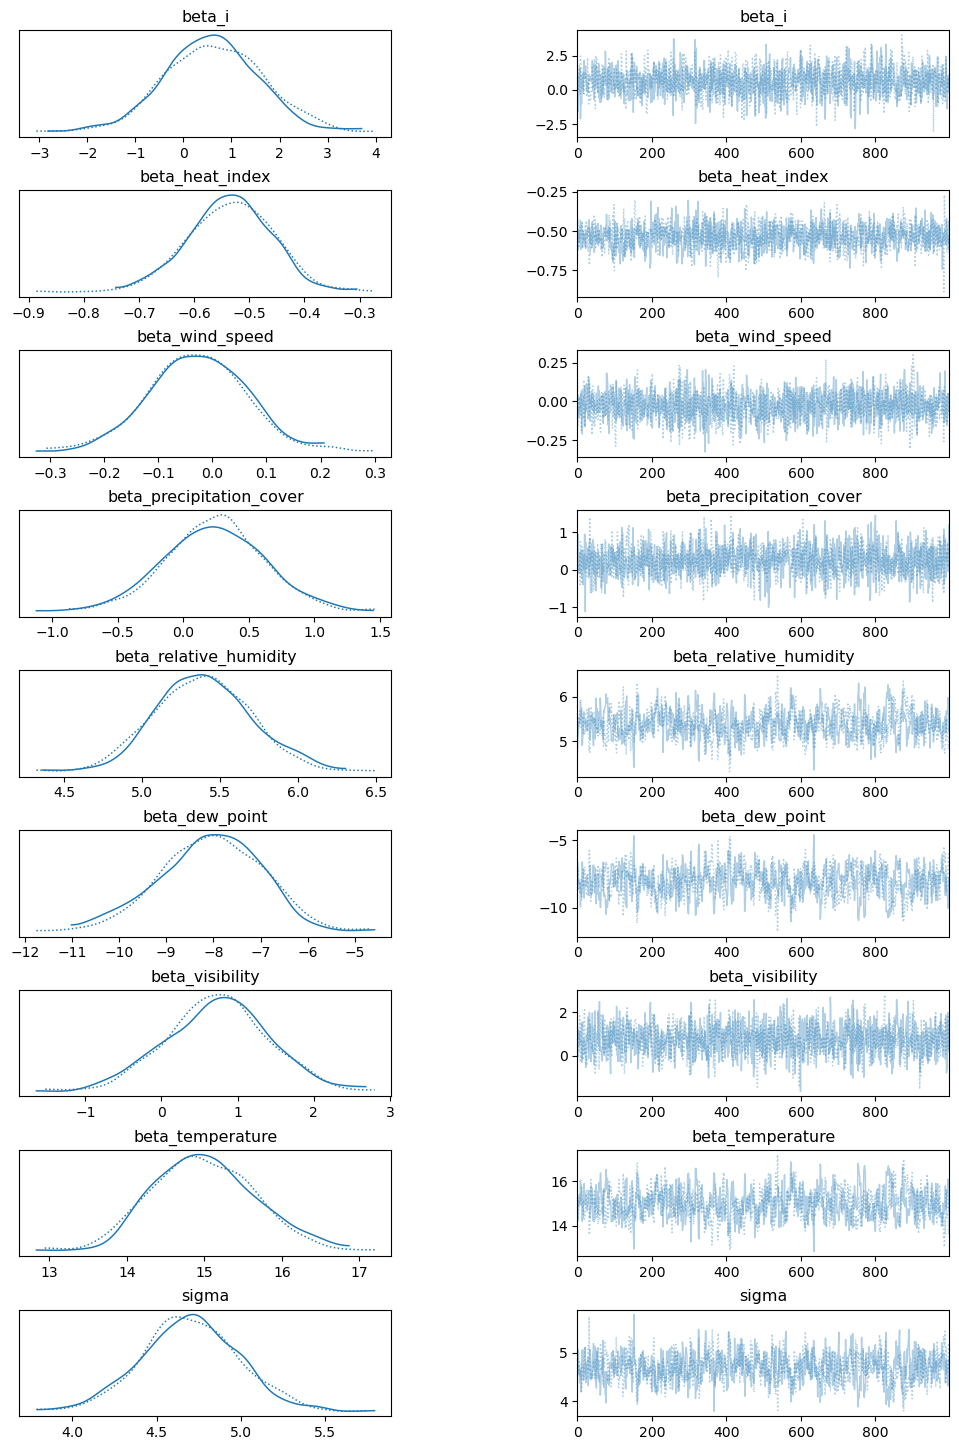

In [21]:
import arviz as az
axes = az.plot_trace(trace)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

##### Horizontal lines represent the 94% HDIs for the estimates of different parameters, labeled as beta_i, beta_heat_index, beta_wind_speed, etc. The length of the line indicates the range of the HDI, giving a visual impression of the uncertainty associated with each estimate.
Points on the lines likely represent the mean or median of the posterior distribution for each parameter.
Outlying points (shown as circles not connected to the lines) may indicate potential outliers or points of interest that fall outside the 94% HDI.
beta_i: This could be the intercept of the model, showing a very narrow HDI, which suggests high certainty about its estimate.
beta_heat_index, beta_wind_speed, beta_precipitation_cover, beta_relative_humidity, beta_dew_point, and beta_visibility: These are the coefficients for the respective variables in the model, showing varying degrees of uncertainty as indicated by the width of their HDIs.

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

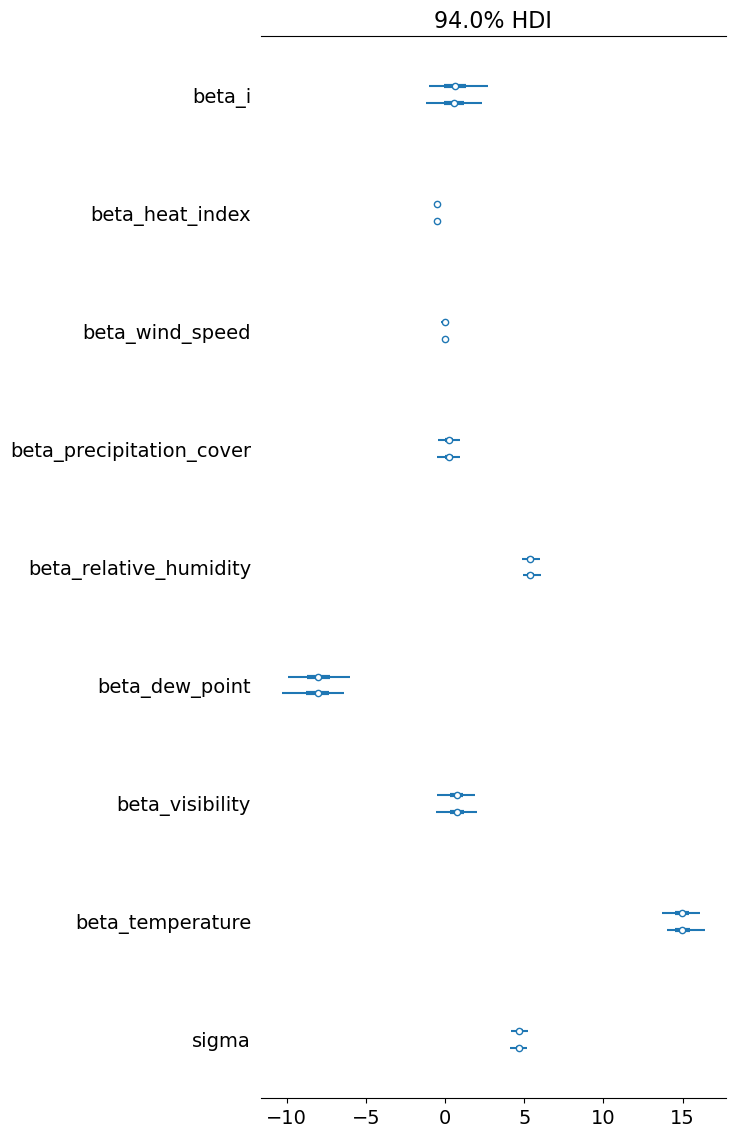

In [22]:
az.plot_forest(trace)

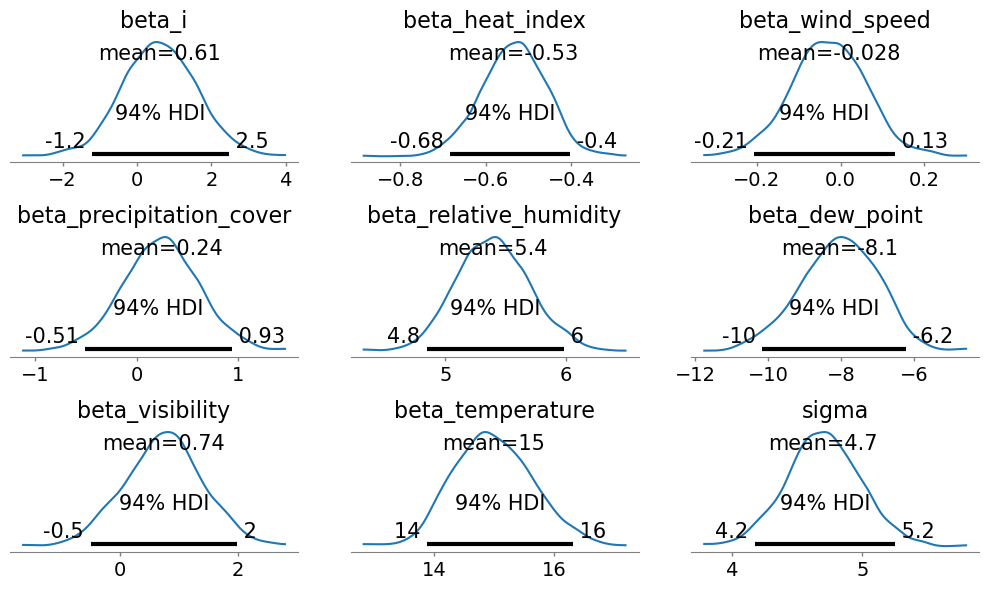

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

pm.plot_posterior(trace, var_names=['beta_i'], ax=axs[0, 0])
pm.plot_posterior(trace, var_names=['beta_heat_index'], ax=axs[0, 1])
pm.plot_posterior(trace, var_names=['beta_wind_speed'], ax=axs[0, 2])
pm.plot_posterior(trace, var_names=['beta_precipitation_cover'], ax=axs[1, 0])
pm.plot_posterior(trace, var_names=['beta_relative_humidity'], ax=axs[1, 1])
pm.plot_posterior(trace, var_names=['beta_dew_point'], ax=axs[1, 2])
pm.plot_posterior(trace, var_names=['beta_visibility'], ax=axs[2, 0])
pm.plot_posterior(trace, var_names=['beta_temperature'], ax=axs[2, 1])
pm.plot_posterior(trace, var_names=['sigma'], ax=axs[2, 2])

fig.tight_layout()
plt.show()

#### we decided to use the mean of every variable to represent the beta_xx parameter

In [30]:
for variable in trace.posterior.data_vars:
    print('Variable: {:25} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(trace.posterior[variable].values)))

Variable: beta_i                    Mean weight in model: 0.6091
Variable: beta_heat_index           Mean weight in model: -0.5350
Variable: beta_wind_speed           Mean weight in model: -0.0279
Variable: beta_precipitation_cover  Mean weight in model: 0.2391
Variable: beta_relative_humidity    Mean weight in model: 5.3944
Variable: beta_dew_point            Mean weight in model: -8.0564
Variable: beta_visibility           Mean weight in model: 0.7353
Variable: beta_temperature          Mean weight in model: 14.9952
Variable: sigma                     Mean weight in model: 4.6997


In [31]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_i,0.609,0.993,-1.201,2.463,0.025,0.021,1567.0,1393.0,1.0
beta_heat_index,-0.535,0.075,-0.683,-0.404,0.002,0.002,1000.0,1084.0,1.0
beta_wind_speed,-0.028,0.089,-0.205,0.129,0.002,0.002,1811.0,1045.0,1.0
beta_precipitation_cover,0.239,0.379,-0.506,0.934,0.009,0.008,1599.0,1415.0,1.0
beta_relative_humidity,5.394,0.305,4.845,5.984,0.016,0.011,380.0,504.0,1.0
beta_dew_point,-8.056,1.063,-10.163,-6.221,0.056,0.040,366.0,482.0,1.0
beta_visibility,0.735,0.669,-0.497,1.991,0.018,0.013,1436.0,1276.0,1.0
beta_temperature,14.995,0.658,13.895,16.320,0.034,0.024,377.0,484.0,1.0
sigma,4.700,0.285,4.174,5.250,0.013,0.009,452.0,634.0,1.0


### This is the formula we will use to predict the sea level pressure

In [32]:
model_formula = 'Sea Level Pressure Mean = '
variables = list(trace.posterior.data_vars)[:-1]
for variable in variables:
    model_formula += ' %0.2f * %s +' % (np.mean(trace.posterior[variable].values), variable)
' '.join(model_formula.split(' ')[:-1])

'Sea Level Pressure Mean =  0.61 * beta_i + -0.53 * beta_heat_index + -0.03 * beta_wind_speed + 0.24 * beta_precipitation_cover + 5.39 * beta_relative_humidity + -8.06 * beta_dew_point + 0.74 * beta_visibility + 15.00 * beta_temperature'

### define the test model, fit it with trace the parameter we gained before and give a random test data in to the model, it should be return the predicted sea level pressure

In [34]:
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.posterior.data_vars:
        var_dict[variable] = trace.posterior[variable].values.ravel()

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sigma'].mean()

    # Actual Value
    actual = test_observation['sea_level_pressure']
    
    # Add in intercept term
    test_observation['i'] = 1
    test_observation = test_observation.drop('sea_level_pressure')
    
    # Align weights and test observation
    var_weights = var_weights['beta_' + test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of sea level pressure
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize = (8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual sea level pressure
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True Sea Level Pressure',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Sea Level Pressure'); plt.ylabel('Density');
    
    plt.ylim(0, 0.15)
    
    # Prediction information
    print('True Sea Level Pressure = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

## It matched! The Model Works
#### based on the model, we gain the estimated distrubution, and we choose the mean estimate ad out predicted data, and the red line pointed out the true sea level pressure, so we can tell, the model match!

Test Observation:
sea_level_pressure     1009.20
dew_point                75.70
temperature              83.50
heat_index              116.40
visibility                5.60
relative_humidity        78.79
precipitation_cover       0.73
wind_speed               13.90
Name: 345, dtype: float64
True Sea Level Pressure = 1009
Average Estimate = 1009.4942
5% Estimate = 1002.0843    95% Estimate = 1017.6855


/var/folders/fk/pm_mynpx0x1154czvxxkwr_40000gn/T/ipykernel_1777/1037824655.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(estimates, hist = True, kde = True, bins = 19,
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


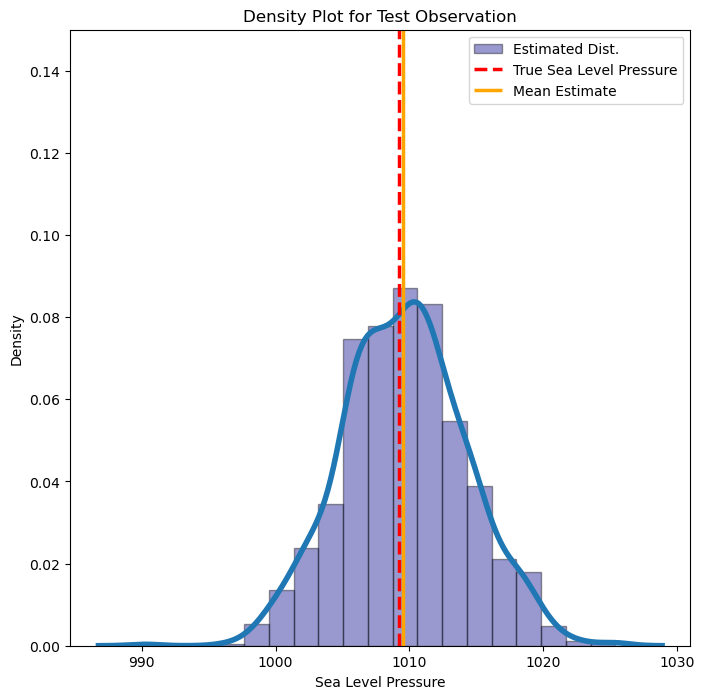

In [35]:
test_model(trace, X_test.iloc[41])

Test Observation:
sea_level_pressure     1008.80
dew_point                75.10
temperature              82.80
heat_index              108.10
visibility                5.40
relative_humidity        79.07
precipitation_cover       1.82
wind_speed               10.30
Name: 318, dtype: float64
True Sea Level Pressure = 1008
Average Estimate = 1009.9960
5% Estimate = 1001.8739    95% Estimate = 1017.4708


/var/folders/fk/pm_mynpx0x1154czvxxkwr_40000gn/T/ipykernel_1777/1037824655.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(estimates, hist = True, kde = True, bins = 19,
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


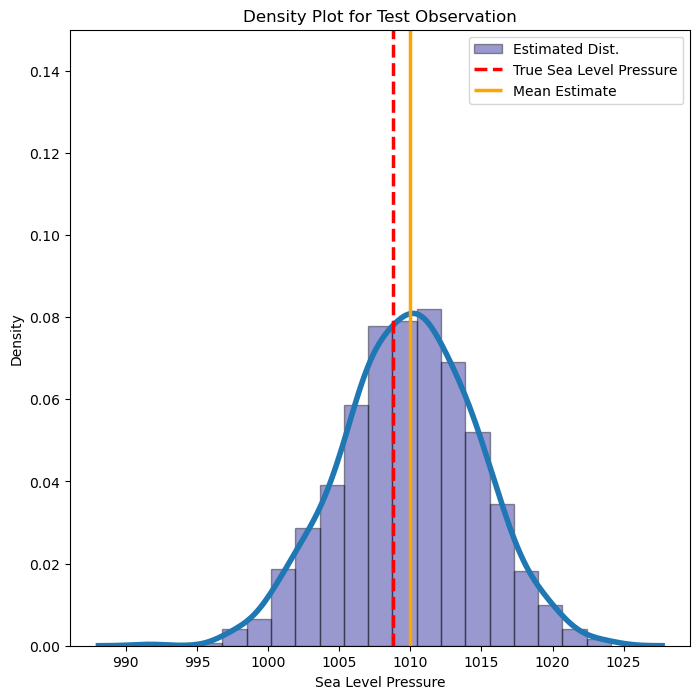

In [37]:
test_model(trace, X_test.iloc[86])

In [38]:
def query_model(trace, new_observation):
    
    # Print information about the new observation
    print('New Observation')
    print(new_observation)
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.posterior.data_vars:
        var_dict[variable] = trace.posterior[variable].values.ravel()
        
    # Standard deviation
    sd_value = var_dict['sigma'].mean()
    
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Align weights and new observation
    var_weights = var_weights['beta_' + new_observation.index]
    
    # Means of variables
    var_means = var_weights.mean(axis=0)
    
    # Mean for observation
    mean_loc = np.dot(var_means, new_observation)
    
    # Distribution of estimates
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)
    
    # Plot the estimate distribution
    plt.figure(figsize = (8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange', linewidth = 2.5)
    plt.title('Density Plot for New Observation');
    plt.xlabel('Sea Level Pressure'); plt.ylabel('Density');
    
    plt.ylim(0, 0.15)
    
    # Estimate information
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

## Customize the data

#### we can input the data of others features except the sea level pressure, it also gives us the prediction.

New Observation
i                        1
dew_point               75
temperature             82
heat_index             100
visibility               6
relative_humidity       80
precipitation_cover      1
wind_speed              13
dtype: int64
Average Estimate = 1008.3256
5% Estimate = 1001.0815    95% Estimate = 1016.1748


/var/folders/fk/pm_mynpx0x1154czvxxkwr_40000gn/T/ipykernel_1777/1099977681.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(estimates, hist = True, kde = True, bins = 19,
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


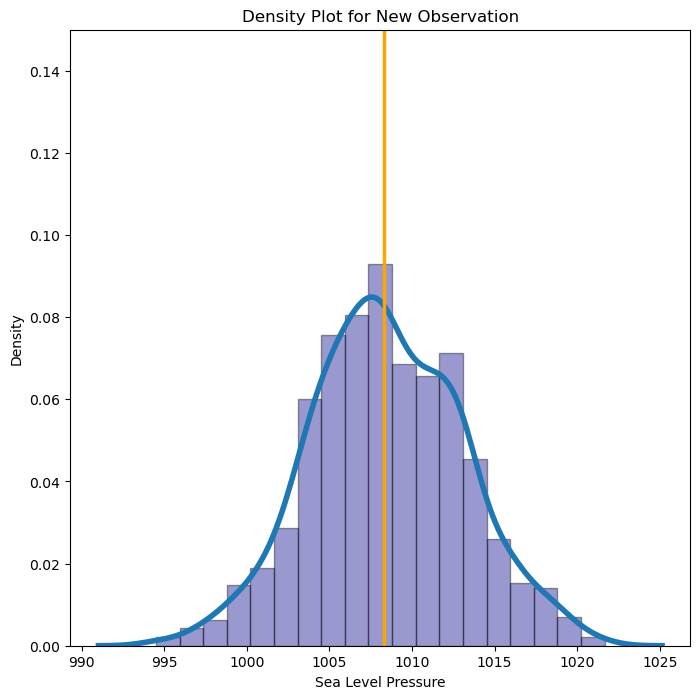

In [39]:
observation = pd.Series({'i': 1, 'dew_point': 75, 'temperature': 82, 
                            'heat_index': 100, 'visibility': 6,
                            'relative_humidity': 80, 'precipitation_cover': 1,
                            'wind_speed': 13})
query_model(trace, observation)

New Observation
i                        1.0
dew_point               76.0
temperature             84.0
heat_index             110.0
visibility               5.5
relative_humidity       81.0
precipitation_cover      1.5
wind_speed              13.5
dtype: float64
Average Estimate = 1030.0421
5% Estimate = 1022.0226    95% Estimate = 1037.5829


/var/folders/fk/pm_mynpx0x1154czvxxkwr_40000gn/T/ipykernel_1777/1099977681.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(estimates, hist = True, kde = True, bins = 19,
/Users/deboo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


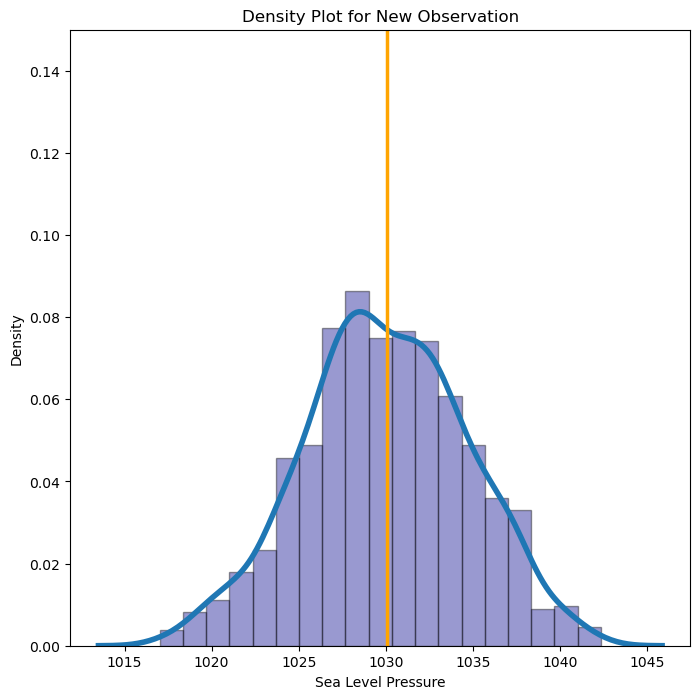

In [40]:
observation = pd.Series({'i': 1, 'dew_point': 76, 'temperature': 84, 
                            'heat_index': 110, 'visibility': 5.5,
                            'relative_humidity': 81, 'precipitation_cover': 1.5,
                            'wind_speed': 13.5})
query_model(trace, observation)

#### 
The model_effect function visualizes the relationship between a predictor variable (query_var) and sea level pressure, using a Bayesian model's trace data and median values of other predictors. It generates a plot with multiple lines, each representing a possible linear relationship derived from the posterior distribution, to show the range and uncertainty of the predicted sea level pressure as the query_var changes. The final output is a graph that helps in understanding the influence of the query_var on sea level pressure within the context of the Bayesian model.

In [41]:
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['beta_i'] + sample['beta_' + query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample['beta_'+var] * X[var].median()
        
        return prediction
    
    figsize = (6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    plt.figure(figsize=figsize)
    for i in np.random.choice(range(len(trace.posterior['beta_i'][1])), size=100, replace=True):
        values = np.linspace(var_min, var_max, 100)
        predictions = [lm(value, {var: trace.posterior[var][1][i] for var in trace.posterior}) for value in values]
        plt.plot(values, predictions, color='blue', alpha=0.4)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Sea Level Pressure', size = 16)
    
    plt.title("Posterior of Sea Level Pressure vs %s" % query_var, size = 18)
    plt.show()

- This graph illustrates a posterior predictive distribution of sea level pressure as a function of dew point, using a Bayesian analysis framework. The key elements of the graph are as follows:

- The x-axis represents the dew point temperature.
- The y-axis represents the sea level pressure.
- The shaded area is most likely representing the 95% Highest Density Interval (HDI) for the sea level pressure at each dew point value.
- The blue shaded area indicates the probability density of sea level pressure; the wider areas show greater uncertainty in the predictions at those dew point values.
- The graph suggests that as the dew point increases, the model predicts a decrease in sea level pressure, with increasing uncertainty at higher dew point values.
- This type of visualization is useful for understanding the relationship between two variables (in this case, dew point and sea level pressure) as modeled by a Bayesian approach, including the uncertainty inherent in the model predictions.

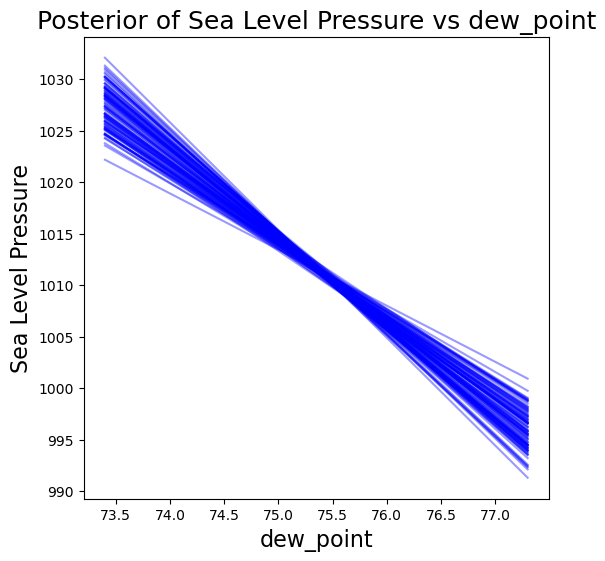

In [42]:
model_effect('dew_point', trace, X_train.drop(columns='sea_level_pressure'))

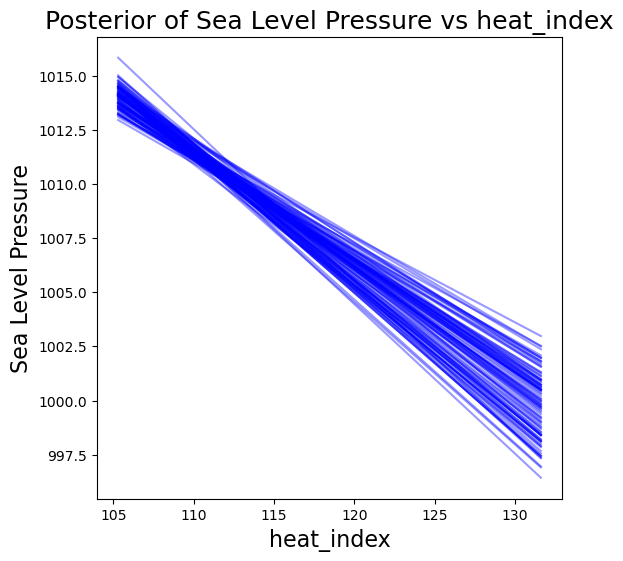

In [43]:
model_effect('heat_index', trace, X_train.drop(columns='sea_level_pressure'))

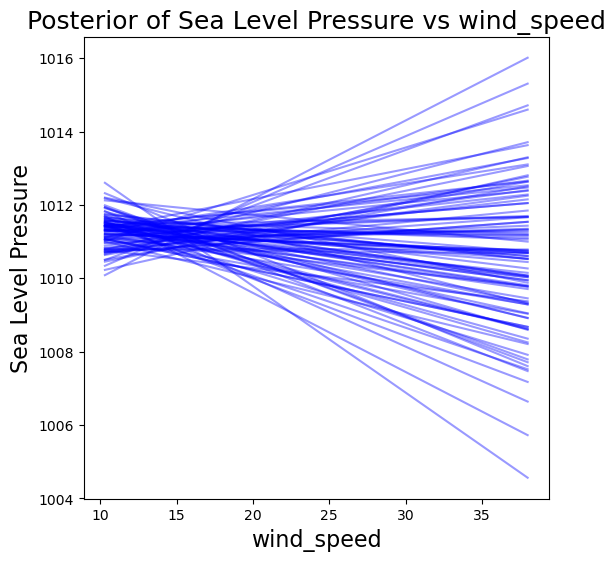

In [44]:
model_effect('wind_speed', trace, X_train.drop(columns='sea_level_pressure'))

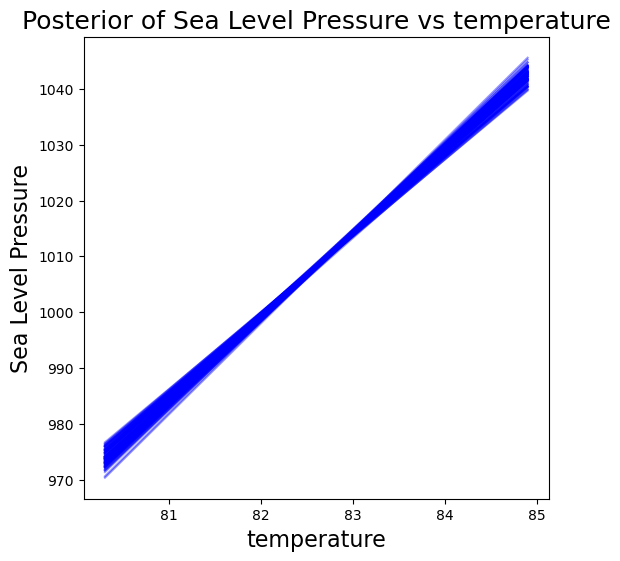

In [45]:
model_effect('temperature', trace, X_train.drop(columns='sea_level_pressure'))

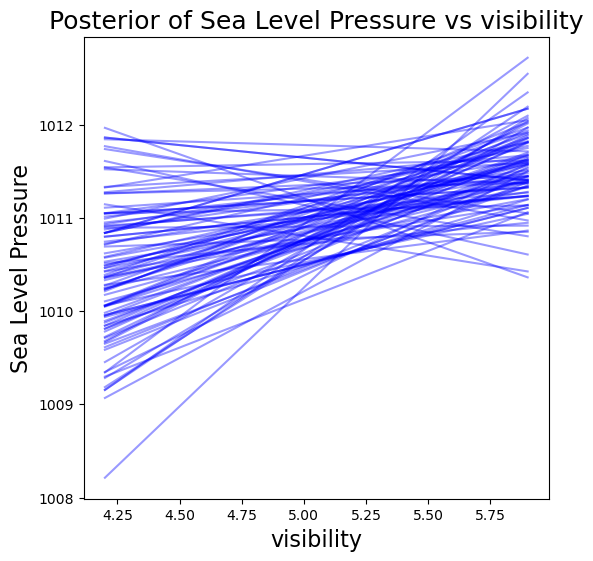

In [46]:
model_effect('visibility', trace, X_train.drop(columns='sea_level_pressure'))

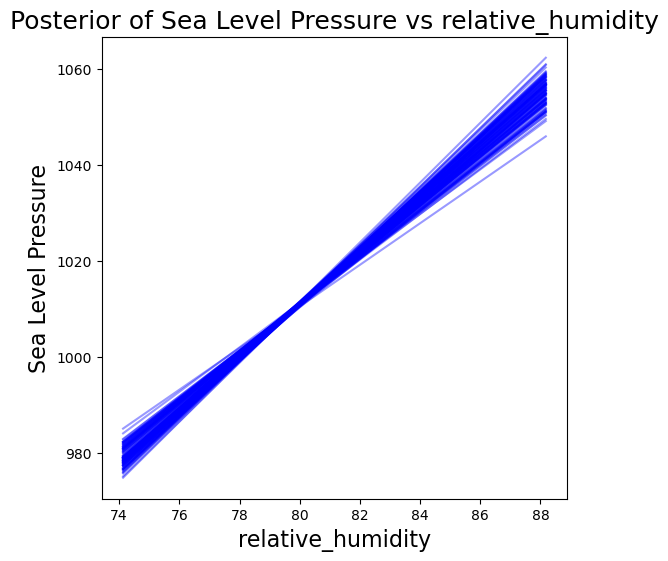

In [47]:
model_effect('relative_humidity', trace, X_train.drop(columns='sea_level_pressure'))

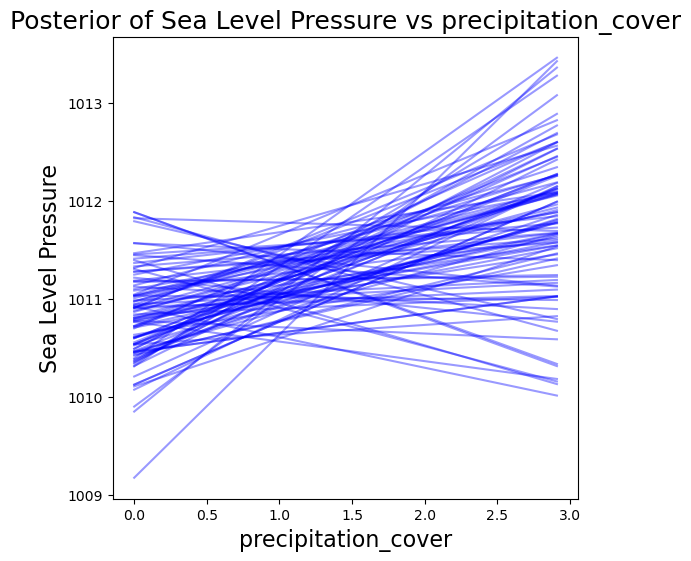

In [48]:
model_effect('precipitation_cover', trace, X_train.drop(columns='sea_level_pressure'))